# Case Study 6 : Data Science in Any Data You Like

**Required Readings:** 
* In this case study, you could use any data as you like.
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using your Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

# Data Collection/Processing: 

In [46]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import random


In [93]:
voice_df = pd.read_csv('voice.csv')
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [94]:
#Checking whether there is any null values
print(voice_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 507.4+ KB
None


In [48]:
#Checking the number of two classes
print("Number of male: {}".format(voice_df[voice_df.label == 'male'].shape[0]))
print("Number of female: {}".format(voice_df[voice_df.label == 'female'].shape[0]))

print voice_df.shape

Number of male: 1584
Number of female: 1584
(3168, 21)


In [49]:
#Correlation
voice_corr = voice_df.corr()
voice_corr

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


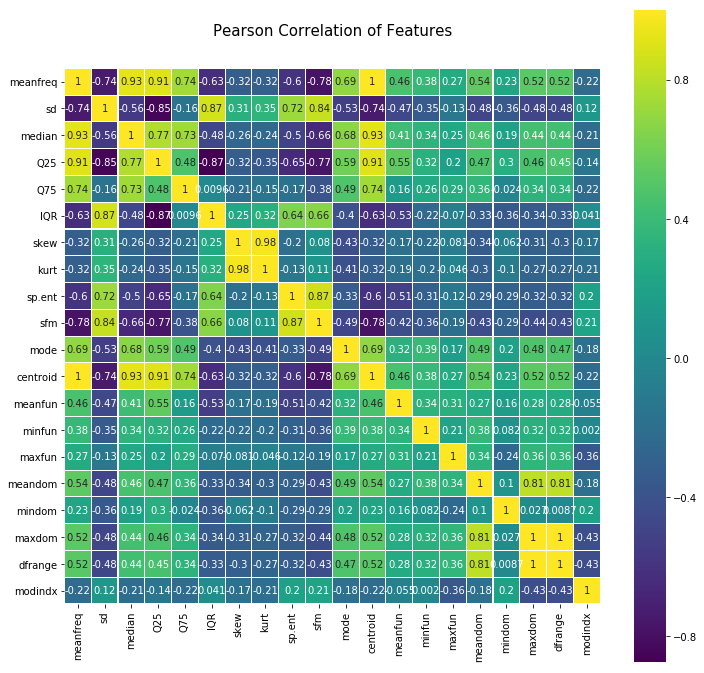

In [50]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(voice_df.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [51]:
#Drop variables
voice_df = voice_df.drop(['centroid', 'dfrange','IQR'], axis=1)

print voice_df.shape

(3168, 18)


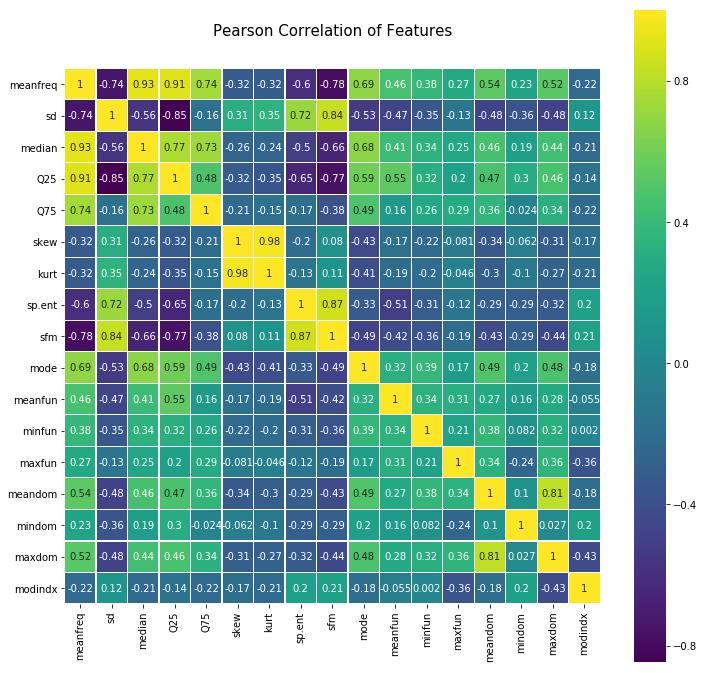

In [52]:
#Check corr again
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(voice_df.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [53]:
#Change label as dummy variable
voice_df.label = pd.get_dummies(voice_df.label)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [66]:
#Split dataset into training and test dataset

random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(voice_df.drop(['label'], axis=1), voice_df.label, test_size = 0.25)
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(2376, 17)
(792, 17)
(2376,)
(792,)


# Data Exploration: Exploring the your data

** plot some properties/statistics/distribution of your data** 

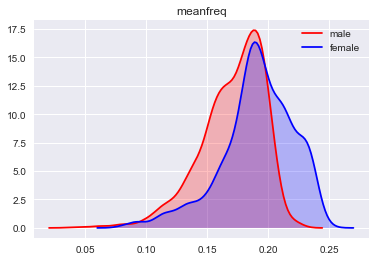

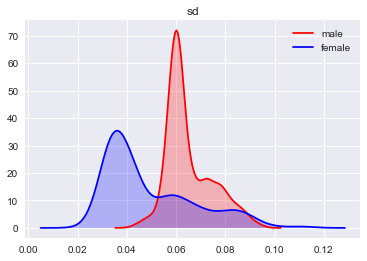

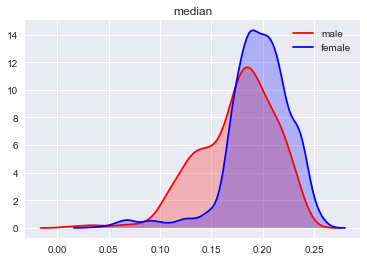

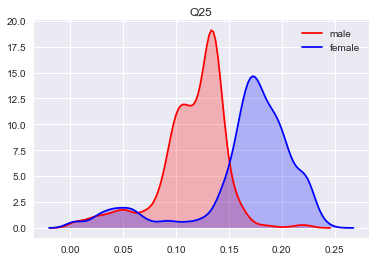

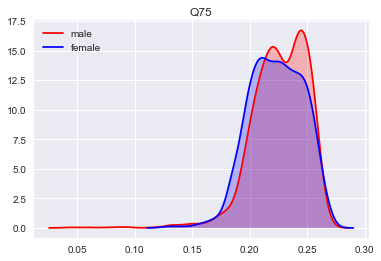

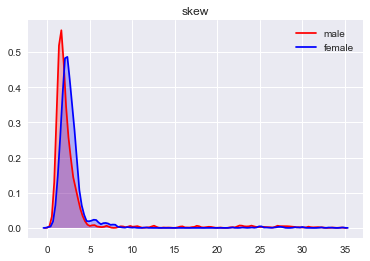

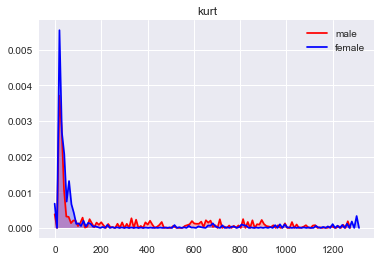

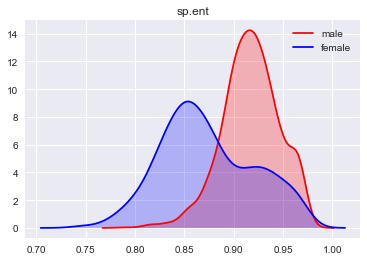

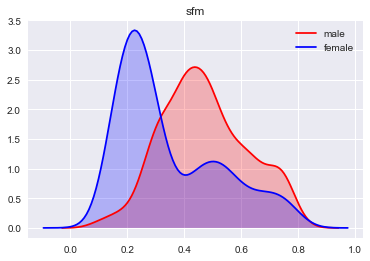

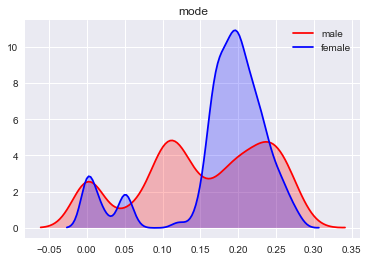

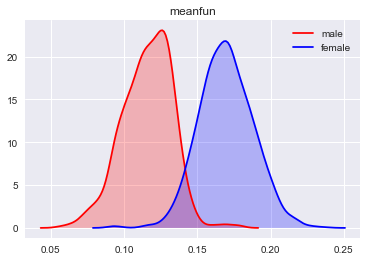

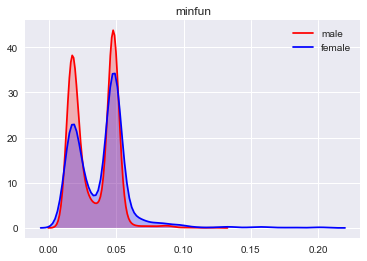

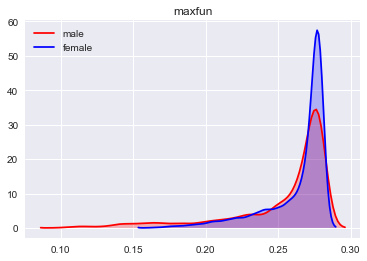

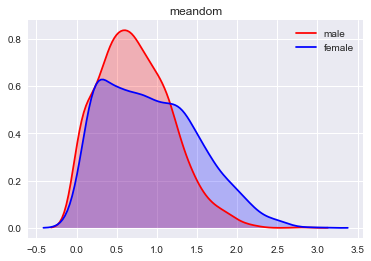

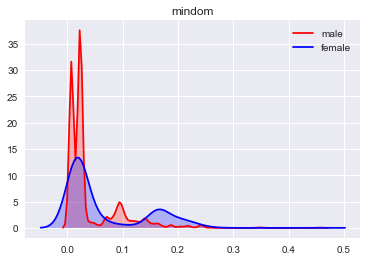

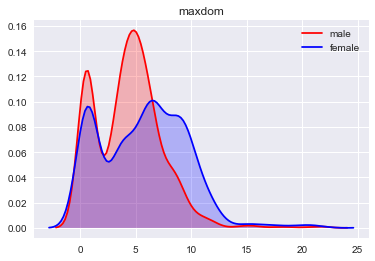

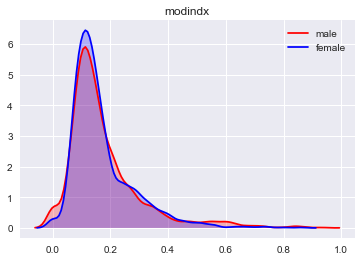

In [68]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
df_male = voice_df[voice_df.label == 0]
df_female = voice_df[voice_df.label == 1]
column_name = list(voice_df.columns.values)

for i in range(voice_df.shape[1]-1):
    sns.plt.title(column_name[i])
    p1 = sns.kdeplot(df_male.iloc[:,i], shade=True, color="r",label='male')
    p1 = sns.kdeplot(df_female.iloc[:,i], shade=True, color="b",label='female')
    sns.plt.show()


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

Write codes to implement the solution in python:

In [56]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


## K-Nearest Neighbor
def compute_distance(Xtrain, Xtest):
    
    D = np.zeros((len(Xtest),len(Xtrain)))
    for i in range(len(Xtest)):
        for j in range(len(Xtrain)):
            D[i,j] = np.linalg.norm(Xtest[i,:] - Xtrain[j,:])
            
    return D 

def k_nearest_neighbor(Xtrain, Ytrain, Xtest, K = 3):

    Ytest = []
    D = compute_distance(Xtrain, Xtest)
    for i in range(len(Xtest)):
        temp = np.zeros((Xtrain.shape[0],2))
        temp[:,0] = D[i,:]
        temp[:,1] = Ytrain
        sorted_temp = temp[temp[:,0].argsort()]
        
        classes_K = list(sorted_temp[:K][:,1])
        count = max(set(classes_K),key = classes_K.count)
        classes_temp = int(count)
        Ytest = np.append(Ytest,classes_temp)

    return Ytest 


In [57]:
X_train_knn1 = np.asmatrix(X_train)
Y_train_knn1 = np.asmatrix(Y_train)
X_test_knn1 = np.asmatrix(X_test)
Y_test_knn1 = np.asmatrix(Y_test)

Y_predict_KNN = k_nearest_neighbor(X_train_knn1, Y_train_knn1,X_test_knn1, K=5)

number_KNN = 0.
for i in range(len(Y_predict_KNN)):
    if Y_predict_KNN[i] == float(Y_test[0,i]):
        number_KNN += 1.
        
accuracy_KNN = number_KNN / len(Y_predict_KNN)
print 'classification accuracy:',accuracy_KNN

classification accuracy: 0.719696969697


In [63]:
#The above was without any tuning ,now we will drop some columns which does not make any sense
#We will drop col=median,mode,Q25,Q75,IQR.
#next edit use only few=meanfreq,sd,median,label(for no error)

from sklearn import neighbors

random.seed(1)
df1=voice_df[['meanfreq','sd','median','meanfun','label']]
X_knn = np.array(df1.drop(['label'], 1))
Y_knn = np.array(df1['label'])

X_train_knn, X_test_knn, Y_train_knn, Y_test_knn=train_test_split(X_knn, Y_knn, test_size=0.25)

model = neighbors.KNeighborsClassifier()
model.fit(X_train_knn, Y_train_knn)

accuracy_knn = model.score(X_test_knn, Y_test_knn)
print('Accuracy_knn='+str(accuracy_knn))

Accuracy_knn=0.9734848484848485


In [67]:
## Logistic Regession

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)
y_pred = LogReg.predict(X_test)

In [68]:
confusion_matrix = confusion_matrix(Y_test, y_pred)
confusion_matrix

array([[371,  23],
       [ 65, 333]], dtype=int64)

In [69]:
(371.+333.)/(371.+23.+65.+333.)

0.8888888888888888

In [70]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.94      0.89       394
          1       0.94      0.84      0.88       398

avg / total       0.89      0.89      0.89       792



In [71]:
#Check accuracy for logistic model
def train_logistic_regression(X_train, Y_train):
    """
    Training logistic regression model with train dataset features(train_x) and target(train_y)
    :param train_x:
    :param train_y:
    :return:
    """
 
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(X_train, Y_train)
    return logistic_regression_model
 
def model_accuracy(trained_model, features, targets):
    """
    Get the accuracy score of the model
    :param trained_model:
    :param features:
    :param targets:
    :return:
    """
    accuracy_score = trained_model.score(features, targets)
    return accuracy_score

In [72]:
# Training Logistic regression model

trained_logistic_regression_model = train_logistic_regression(X_train, Y_train)

train_accuracy = model_accuracy(trained_logistic_regression_model, X_train, Y_train)
 
# Testing the logistic regression model
test_accuracy = model_accuracy(trained_logistic_regression_model, X_test, Y_test)
 
print "Logistic Train Accuracy :: ", train_accuracy
print "Logistic Test Accuracy :: ", test_accuracy
    

Train Accuracy ::  0.8930976430976431
Test Accuracy ::  0.8888888888888888


In [88]:
#The above was without any tuning ,now we will drop some columns which does not make any sense
#We will drop col=median,mode,Q25,Q75,IQR.
#next edit use only few=meanfreq,sd,median,label(for no error)

df2=voice_df[['meanfreq','sd','median','meanfun','label']]
#df2 = voice_df[['Q25','Q75', 'kurt', 'sp.ent', 'sfm', 'meanfun', 'minfun', 'modindx', 'label']]
X_logit = np.array(df2.drop(['label'], 1))
Y_logit = np.array(df2['label'])

random.seed(1)
X_train_logit, X_test_logit, Y_train_logit, Y_test_logit=train_test_split(X_logit, Y_logit, test_size=0.25)

# Training Logistic regression model

modified_logistic_regression_model = train_logistic_regression(X_train_logit, Y_train_logit)
modified_train_accuracy = model_accuracy(modified_logistic_regression_model, X_train_logit, Y_train_logit)
 
# Testing the logistic regression model
test_accuracy = model_accuracy(modified_logistic_regression_model, X_test_logit, Y_test_logit)
 
print "Modified Logistic Train Accuracy :: ", train_accuracy
print "Modified Logistic Test Accuracy :: ", test_accuracy

Modified Logistic Train Accuracy ::  0.8930976430976431
Modified Logistic Test Accuracy ::  0.9090909090909091


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary








*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 6".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) plot some properties/statistics/distribution of your data (10 points):
       0: missing answer
       4: okay, but with major problems
       7: good, but with minor problems
      10: perfect
    

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  (5 bonus points)
        0: I vote the other team is better than this team
        5: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9


